In [156]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve
import models.evaluate_models
from models.train_model import *
from models.evaluate_models import print_metrics
from preprocessing.preprocessing import *
import importlib
import models.train_model
import models.evaluate_models
import config_module.config
import config_module.config 
import preprocessing.preprocessing
importlib.reload(models.train_model) 
importlib.reload(models.evaluate_models) 
importlib.reload(preprocessing.preprocessing)
importlib.reload(config_module.config)

<module 'config_module.config' from 'c:\\Users\\Danny Phong\\Documents\\PROJECT\\WebVulnerabilities\\config_module\\config.py'>

In [157]:
def heatmap( model_name, y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Hợp lệ', 'Độc hại'])
    plt.title(f'Confusion Matrix trên tập test ({model_name})')
    plt.xlabel('Prediction')
    plt.ylabel('Reality')
    plt.show()

In [158]:
def plot_roc_curve(y_test, y_pred, model_name, y_test_proba):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve trên tập test ({model_name})')
    plt.legend()
    plt.show()

In [159]:

    
from sklearn.model_selection import train_test_split

import numpy as np
from config_module.config import CSIC_FILE, PARSE_REQUEST_TEST, PARSE_REQUEST_TRAIN, XTRAIN, YTRAIN, XVAL, YVAL, XTEST, YTEST
from data.raw_data import load

from config_module.config import RANDOM_STATE, TEST_SIZE_1, TEST_SIZE_2


data_raw = load(CSIC_FILE)
# data_raw_train = load(PARSE_REQUEST_TEST)
# data_raw1 = load(PARSE_REQUEST_TEST)
X_resampled, y_resampled = CSIC_preprocess(data_raw)
# X_resampled_1, y_resampled_1 = parsed_request_train_preprocess(data_raw_train)



# Train:Val:Test theo tỷ lệ 7:2:1
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=TEST_SIZE_1, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_SIZE_2, random_state=RANDOM_STATE)

# X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X_resampled_1, y_resampled_1, test_size=TEST_SIZE_1, random_state=RANDOM_STATE)
# X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=TEST_SIZE_2, random_state=RANDOM_STATE)


PFeature Distribution by Class:
                url_length  url_special_chars  url_malicious_keywords  \
classification                                                          
0                78.985944           8.930694                1.290833   
1               106.611769          13.273050                2.087133   

                url_params_count  content_length  content_special_chars  \
classification                                                            
0                       1.166667       23.458167               2.875139   
1                       2.233034       50.990824               7.418033   

                content_malicious_keywords  
classification                              
0                                 0.513056  
1                                 1.123399  
Feature Distribution was saved!
Feature matrix shape: 300


In [160]:
np.save( XTRAIN,X_train),
np.save( YTRAIN,y_train),
np.save( XVAL,X_val),
np.save( YVAL,y_val),
np.save( XTEST,X_test),
np.save( YTEST,y_test)

In [161]:
from config_module.config import XTRAIN, YTRAIN, XTEST, YTEST, XVAL, YVAL
from numpy import load
import numpy as np
X_train = np.load(XTRAIN)
y_train = np.load(YTRAIN)
X_test = np.load(XTEST)
y_test = np.load(YTEST)
X_val = np.load(XVAL)
y_val = np.load(YVAL)

Training time (s):16.35
Prediction time (s):0.03
✅ Mô hình đã được lưu tại: Decision_tree_model.pkl

Validation on Tập val:
Accuracy: 0.9437
Test Error (1-Accuracy): 0.0563
Precision: 0.9485
Recall: 0.9393
F1-Score: 0.9439
ROC-AUC: 0.9456
Log Loss: 1.9551

Validation on Tập test:
Accuracy: 0.9419
Test Error (1-Accuracy): 0.0581
Precision: 0.9397
Recall: 0.9437
F1-Score: 0.9417
ROC-AUC: 0.9437
Log Loss: 2.0237
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9437
Test Error (1-Accuracy): 0.0563
Precision: 0.9485
Recall: 0.9393
F1-Score: 0.9439
ROC-AUC: 0.9456
Log Loss: 1.9551

Validation on Test Set:
Accuracy: 0.9419
Test Error (1-Accuracy): 0.0581
Precision: 0.9397
Recall: 0.9437
F1-Score: 0.9417
ROC-AUC: 0.9437
Log Loss: 2.0237


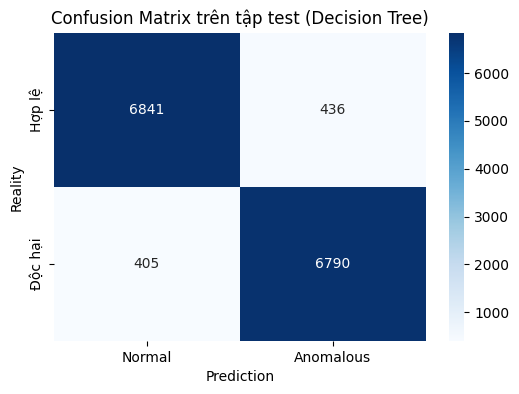

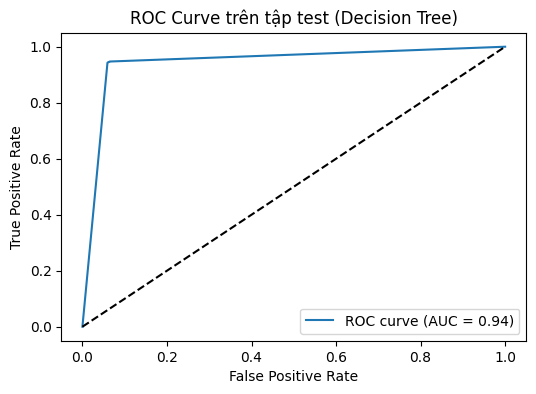

In [162]:
def train_test_decision_tree():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = decision_tree(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Decision Tree", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Decision Tree", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('Decision Tree', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Decision Tree', y_test_proba)
    
    
train_test_decision_tree()

In [163]:
def train_test_linear():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = linear_svc(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("LinearSVC", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("LinearSVC", y_test, y_test_pred, y_test_proba, "Test Set")
   
    heatmap('Linear SVC', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Linear SVC', y_test_proba)

Training time (s):9.64
Prediction time (s):0.08
✅ Mô hình đã được lưu tại: linearsvc.pkl

Validation on Tập val:
Accuracy: 0.9454
Test Error (1-Accuracy): 0.0546
Precision: 0.9598
Recall: 0.9307
F1-Score: 0.9450
ROC-AUC: 0.9884
Log Loss: 0.1328

Validation on Tập test:
Accuracy: 0.9471
Test Error (1-Accuracy): 0.0529
Precision: 0.9532
Recall: 0.9398
F1-Score: 0.9465
ROC-AUC: 0.9888
Log Loss: 0.1312
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9454
Test Error (1-Accuracy): 0.0546
Precision: 0.9598
Recall: 0.9307
F1-Score: 0.9450
ROC-AUC: 0.9884
Log Loss: 0.1328

Validation on Test Set:
Accuracy: 0.9471
Test Error (1-Accuracy): 0.0529
Precision: 0.9532
Recall: 0.9398
F1-Score: 0.9465
ROC-AUC: 0.9888
Log Loss: 0.1312


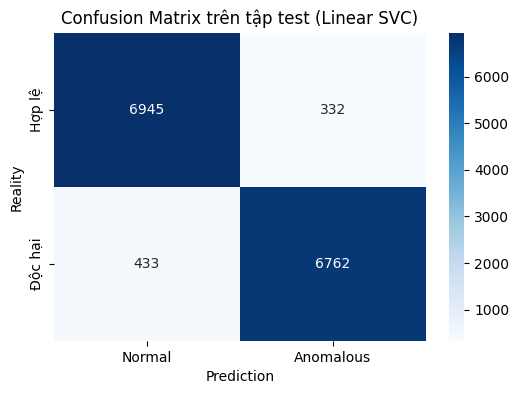

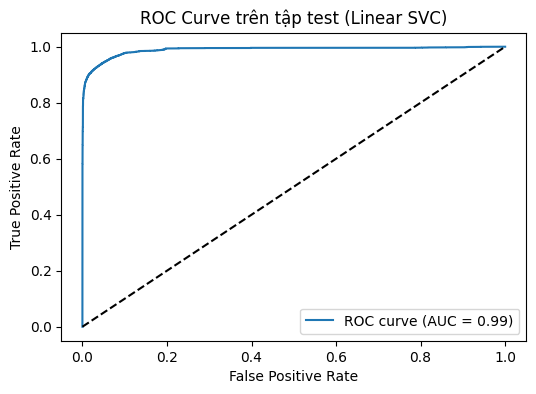

In [164]:
train_test_linear()

In [165]:

def train_test_knn():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = knn(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("KNN", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("KNN", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('KNN', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'KNN', y_test_proba)

train_test_knn()

Training time (s):0.01
Prediction time (s):5.13
✅ Mô hình đã được lưu tại: knn.pkl

Validation on Tập val:
Accuracy: 0.9499
Test Error (1-Accuracy): 0.0501
Precision: 0.9445
Recall: 0.9568
F1-Score: 0.9506
ROC-AUC: 0.9875
Log Loss: 0.3074

Validation on Tập test:
Accuracy: 0.9461
Test Error (1-Accuracy): 0.0539
Precision: 0.9386
Recall: 0.9540
F1-Score: 0.9462
ROC-AUC: 0.9873
Log Loss: 0.2881
📊 Kết quả đã được lưu vào: model_results.csv


ValueError: too many values to unpack (expected 5)

Training time (s):0.16
Prediction time (s):0.19
 Mô hình đã được lưu tại: naive_bayes_model.pkl

Validation on tập val:
Accuracy: 0.8077
Test Error (1-Accuracy): 0.1923
Precision: 0.8558
Recall: 0.7435
F1-Score: 0.7957
ROC-AUC: 0.9094
Log Loss: 6.6735

Validation on tập test:
Accuracy: 0.8050
Test Error (1-Accuracy): 0.1950
Precision: 0.8453
Recall: 0.7440
F1-Score: 0.7914
ROC-AUC: 0.9044
Log Loss: 6.7749
 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.8077
Test Error (1-Accuracy): 0.1923
Precision: 0.8558
Recall: 0.7435
F1-Score: 0.7957
ROC-AUC: 0.9094
Log Loss: 6.6735

Validation on Test Set:
Accuracy: 0.8050
Test Error (1-Accuracy): 0.1950
Precision: 0.8453
Recall: 0.7440
F1-Score: 0.7914
ROC-AUC: 0.9044
Log Loss: 6.7749


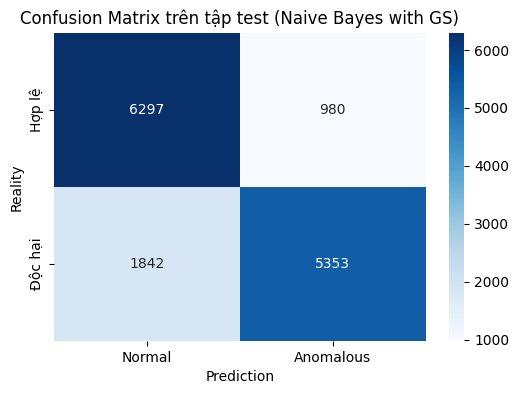

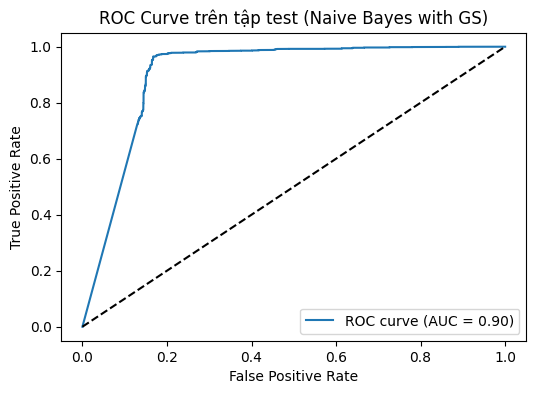

In [ ]:

def train_test_naive_bayes():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = naive_bayes_opt_gs(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Naive Bayes", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Naive Bayes", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('Naive Bayes with GS', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Naive Bayes with GS', y_test_proba)
train_test_naive_bayes()

CSIC dataset
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tranining time (s): 260.00

Best hyperparameter : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best recall on cross-validation: 0.9922661776971261
Prediction time (s): 0.52

Validation on Validation Set:
Accuracy: 0.9453
Test Error (1-Accuracy): 0.0547
Precision: 0.9088
Recall: 0.9908
F1-Score: 0.9480
ROC-AUC: 0.9949
Log Loss: 0.1201

Validation on Test Set:
Accuracy: 0.9389
Test Error (1-Accuracy): 0.0611
Precision: 0.8969
Recall: 0.9911
F1-Score: 0.9416
ROC-AUC: 0.9943
Log Loss: 0.1240


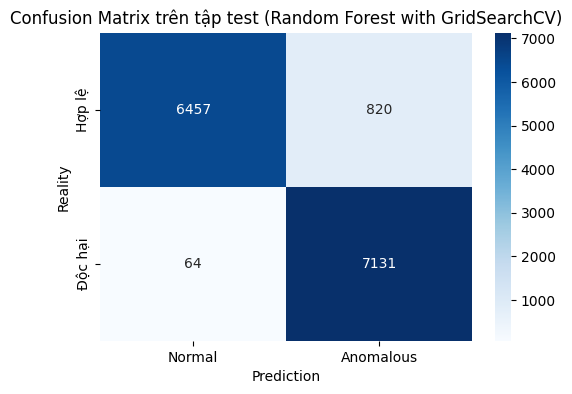

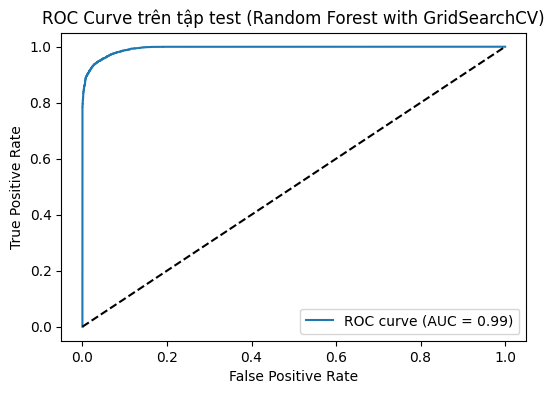

In [ ]:
def train_test_rf():
    print("CSIC dataset")
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = random_forest_grid_search(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Random Forest", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Random Forest", y_test, y_test_pred, y_test_proba, "Test Set")
    # print("ECML dataset")
    # y_test_pred_1, y_test_proba_1, y_val_pred_1, y_val_proba_1, best_model = random_forest_grid_search(X_train_1, y_train_1, X_test_1, X_val_1)
    # print_metrics("Random Forest", y_val_1, y_val_pred_1, y_val_proba_1, "Validation Set")
    # print_metrics("Random Forest", y_test_1, y_test_pred_1, y_test_proba_1, "Test Set")
    heatmap('Random Forest with GridSearchCV', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Random Forest with GridSearchCV', y_test_proba)
train_test_rf()

Training time (s):6.67
Prediction time (s):0.16

Validation on Validation Set:
Accuracy: 0.9471
Test Error (1-Accuracy): 0.0529
Precision: 0.9142
Recall: 0.9877
F1-Score: 0.9495
ROC-AUC: 0.9942
Log Loss: 0.1090

Validation on Test Set:
Accuracy: 0.9410
Test Error (1-Accuracy): 0.0590
Precision: 0.9039
Recall: 0.9861
F1-Score: 0.9432
ROC-AUC: 0.9936
Log Loss: 0.1147


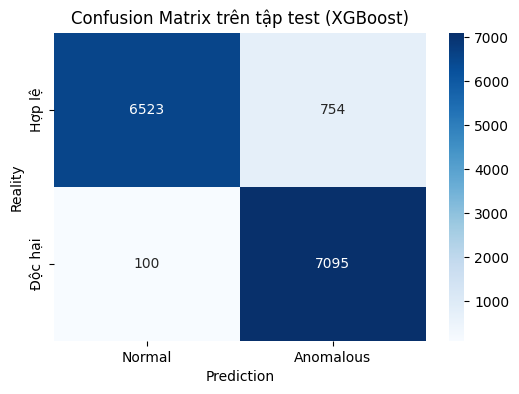

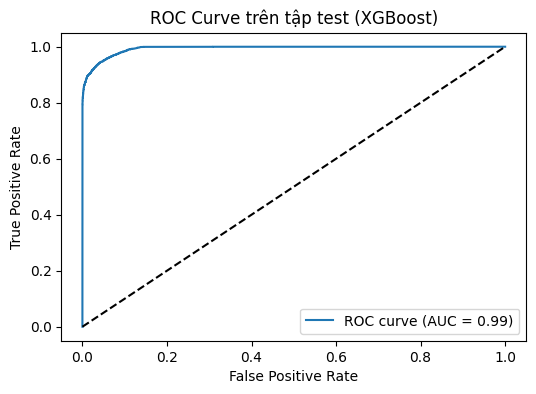

In [ ]:
def train_test_xgboost():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = xgboost(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("XGboot", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("XGboot", y_test, y_test_pred, y_test_proba, "Test Set")   
    heatmap('XGBoost', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'XGBoost', y_test_proba)
train_test_xgboost()